## Preparing required tools
- Data Analysis and Manipulation
    * pandas
    * Matplotlib
    * Numpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic function - inline plot
%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve 

## Load data

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.info()

<Axes: xlabel='target'>

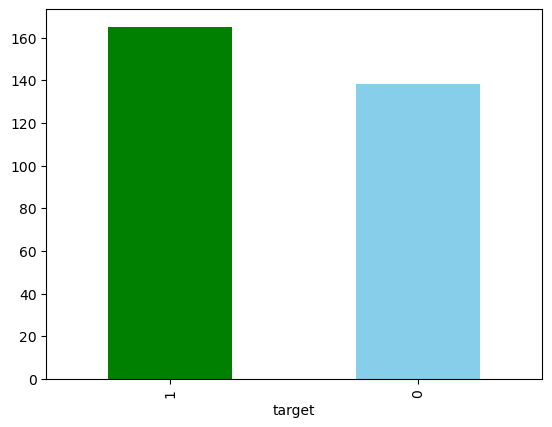

In [4]:
df["target"].value_counts().plot(kind="bar", color=["green", "skyblue"])

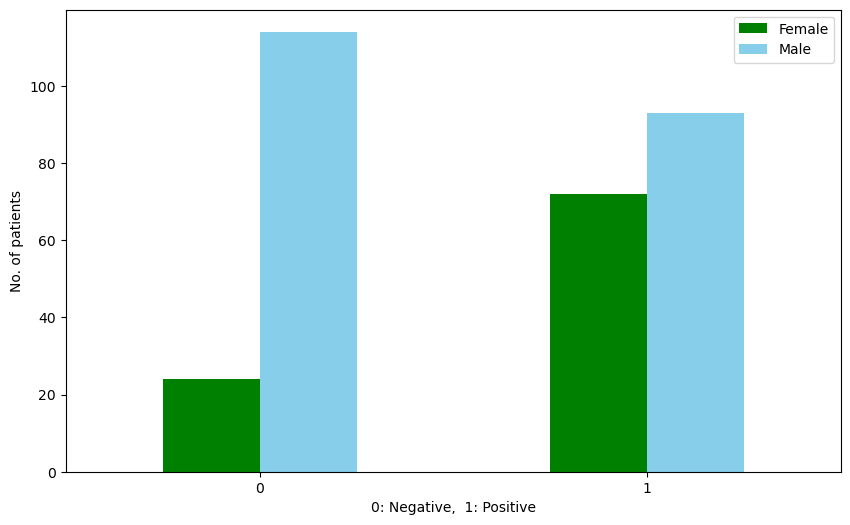

In [13]:
# Comparing target column against sex column
pd.crosstab(df['target'], df['sex']).plot(kind="bar", figsize=(10,6), color=['green','skyblue'])
plt.legend(["Female", "Male"])
plt.xlabel("0: Negative,  1: Positive")
plt.ylabel("No. of patients")
plt.xticks(rotation=0);